In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
import matplotlib.pylab as plb

from scipy.stats import linregress

In [3]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)

In [5]:
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month

In [6]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]

In [7]:
housing_df3 = residential_df[['BATHRM','WARD','BEDRM','HF_BATHRM','YEAR','PRICE']]
housing_df3 = housing_df3[~(housing_df3['YEAR'] < 2007.0)] 
housing_df3 = housing_df3[~(housing_df3['YEAR'] > 2017.0)]

In [8]:
ward_4_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_one_bath_df = ward_4_two_bed_one_bath[ward_4_two_bed_one_bath['BEDRM'] == 2]
ward_4_two_bed_one_bath_df2 = ward_4_two_bed_one_bath_df[ward_4_two_bed_one_bath_df['BATHRM'] == 1]
ward_4_two_bed_one_bath_df3 = ward_4_two_bed_one_bath_df2[ward_4_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_one_bath_avg = pd.DataFrame(ward_4_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_one_bath_avg = ward_4_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_4_two_bed_one_bath_avg_df = ward_4_two_bed_one_bath_avg.reset_index()
ward_4_two_bed_one_bath_avg_df

,YEAR,2Bd 1Ba Price
0,2007.0,277272.000000
1,2008.0,302000.000000
2,2009.0,256337.500000
3,2010.0,230633.333333
4,2011.0,229966.666667
5,2012.0,217125.000000
6,2013.0,364083.333333
7,2014.0,332585.666667
8,2015.0,378714.142857
9,2016.0,431493.750000


21190.11601731602
-42314600.636580095


<IPython.core.display.Javascript object>


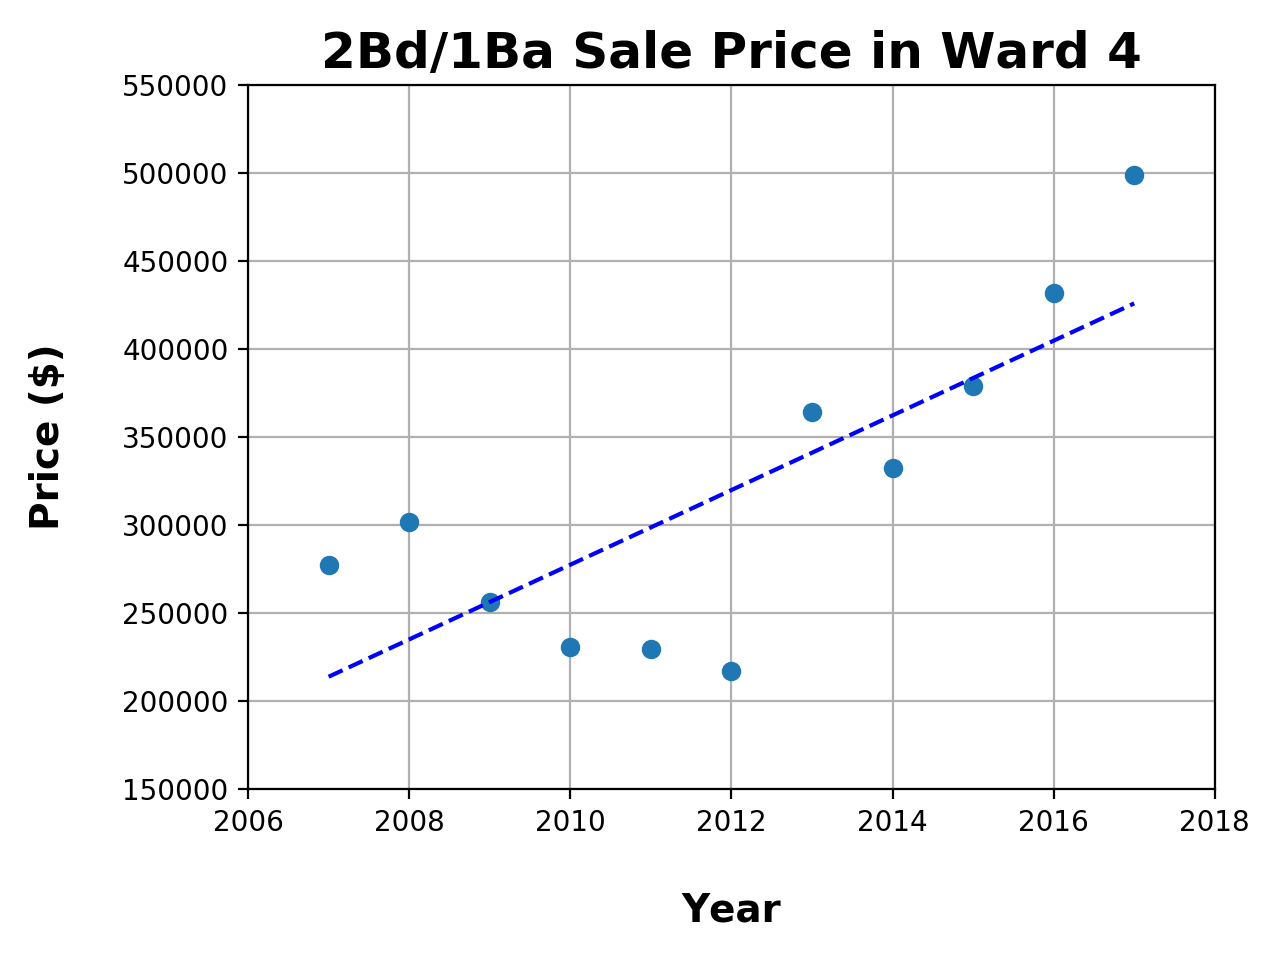

In [9]:
x4 = ward_4_two_bed_one_bath_avg_df['YEAR']
y4 = ward_4_two_bed_one_bath_avg_df['2Bd 1Ba Price']

(slope, intercept, _, _, _) = linregress(x4, y4)
fit = slope * x4 + intercept
s=slope
yint=intercept
print(s)
print(yint)


# Plot data
fig, ax = plt.subplots()

ax.set_xlim(2006,2018)
ax.set_ylim(150000,550000)

ax.set_xlabel("\nYear", fontsize=14, fontweight='bold')
ax.set_ylabel("Price ($)\n", fontsize=14, fontweight='bold')

ax.plot(x4, y4, linewidth=0, marker='o')
ax.plot(x4, fit, 'b--')

plt.title("2Bd/1Ba Sale Price in Ward 4", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.grid()

plt.show()

plt.savefig("NewImages/ward4_type_scatter.png")

In [10]:
year1 = 2019.0
year1_price = s * year1 + yint
print("The average sale price in ward 4 in 2019 will be " +
      str(s * year1 + yint) + ".")

year2 = 2029.0
year2_price = s * year2 + yint
print("The average sale price in ward 4 in 2029 will be " +
      str(s * year2 + yint) + ".")

profit = year2_price - year1_price
print(profit)

The average sale price in ward 4 in 2019 will be 468243.60238095373.
The average sale price in ward 4 in 2029 will be 680144.7625541091.
211901.16017315537
